# Heart Failure Prediction Dataset

https://www.kaggle.com/fedesoriano/heart-failure-prediction

## Data Decription

### Context

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

#### Attribute Information

1. Age: age of the patient (years) <br>
2. Sex: sex of the patient <br>
&nbsp; &nbsp; M: Male <br>
&nbsp; &nbsp; F: Female <br>
3. ChestPainType: chest pain type <br>
&nbsp; &nbsp; TA: Typical Angina <br>
&nbsp; &nbsp; ATA: Atypical Angina <br>
&nbsp; &nbsp; NAP: Non-Anginal Pain <br>
&nbsp; &nbsp; ASY: Asymptomatic <br>
4. RestingBP: resting blood pressure (mm Hg) <br>
5. Cholesterol: serum cholesterol (mg/dl) <br>
6. FastingBS: fasting blood sugar <br>
&nbsp; &nbsp; 1: if FastingBS > 120 mg/dl <br>
&nbsp; &nbsp; 0: otherwise <br>
7. RestingECG: resting electrocardiogram results <br>
&nbsp; &nbsp; Normal: Normal <br>
&nbsp; &nbsp; ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) <br>
&nbsp; &nbsp; LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] <br>
8. MaxHR: maximum heart rate achieved (Numeric value between 60 and 202) <br>
9. ExerciseAngina: exercise-induced angina <br>
&nbsp; &nbsp; Y: Yes <br>
&nbsp; &nbsp; N: No <br>
10. Oldpeak: oldpeak = ST (Numeric value measured in depression) <br>
11. ST_Slope: the slope of the peak exercise ST segment <br>
&nbsp; &nbsp; Up: upsloping <br>
&nbsp; &nbsp; Flat: flat <br>
&nbsp; &nbsp; Down: downsloping] <br>
12. HeartDisease: output class <br>
&nbsp; &nbsp; 1: Heart disease <br>
&nbsp; &nbsp; 0: Normal <br>

#### Source

This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

Cleveland: 303 observations <br>
Hungarian: 294 observations <br>
Switzerland: 123 observations <br>
Long Beach VA: 200 observations <br>
Stalog (Heart) Data Set: 270 observations <br>

Total: 1190 observations <br>
Duplicated: 272 observations <br>

Final dataset: 918 observations <br>

## Loading Libraries, Customizing Color Theme, Data Loading

### Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

import category_encoders as ce
import os
import math
import random
import time
import datetime

from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, auc

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Recall

# from scipy import stats as st

# from IPython.display import Image

%matplotlib inline

seed = 42

2022-11-10 19:19:10.325357: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Customizing Color Theme, etc.

In [2]:
# Blue and Red

color = ['#6E9CC5']
palette = ['#5691C4', '#BF2D2D', '#E7DD73', '#00937F', '#FFC387', '#986960',
           '#97A5CD', '#586BA4', '#587B7F', '#E41B79', '#C0C0C0', '#505050']

corr_matrix = ['#5691C4', '#78A7D0', '#9ABDDC', '#BBD3E7', '#DDE9F3',
               '#FFFFFF', '#F2DEDE', '#EBCCCC', '#D79999', '#C46666', '#B74747']
report = ['#E6E9EC', '#EBEDF0', '#F0F2F4', '#F5F6F7', '#FAFBFB',
          '#FFFFFF', '#ECD4D5', '#D8AAAA', '#C57F80', '#B15555', '#9E2A2B']
gradient_blue = ['#3375B0', '#407EB5', '#4C86BA', '#598FBF', '#6698C4',
                 '#73A0C9', '#7FA9CD', '#8CB1D2', '#99BAD7', '#A6C3DC',
                 '#B2CBE1', '#BFD4E6', '#CCDCEB', '#D9E5F0', '#E5EDF5', '#F2F6FA']
gradient_grey = ['#FCFCFC', '#F8F8F8', '#D3D3D3', '#CCCCCC', 
                 '#9D9D9D', '#8D8D8D', '#7D7D7D', '#606060', '#505050']
pairplot = ['#8DB4D7', '#BF2D2D', '#E7DD73', '#00937F', '#FFC387', '#986960',
            '#97A5CD', '#586BA4', '#587B7F', '#E41B79', '#C0C0C0', '#505050']

custom_params = {'axes.spines.right': False, 'axes.spines.top': False, 'axes.spines.left': False}
sns.set_theme(style='ticks', palette=palette, rc=custom_params)

### Data Loading

In [3]:
data_raw = pd.read_csv('heart.csv')

## Data Overview

### Functions

In [4]:
def create_var_lists(df):

    global var_list
    var_list = df.columns
    global tar_list
    tar_list = []
    global feat_list
    feat_list = df.columns[:-1]
    global con_feat_list
    con_feat_list = []
    global cat_feat_list
    cat_feat_list = []
    global nom_feat_list
    nom_feat_list = []
    global bin_feat_list
    bin_feat_list = []

    col = df.columns.to_list()
    col_var = df.describe().columns.to_list()

    for i in col[:-1]:
        if col_var.count(i) == 1:
            if df[i].value_counts().count() == 2:
                bin_feat_list.append(i)
                cat_feat_list.append(i)
            else:
                con_feat_list.append(i)

        if col_var.count(i) == 0:
            if df[i].value_counts().count() == 2:
                bin_feat_list.append(i)
                cat_feat_list.append(i)
            else:
                nom_feat_list.append(i)
                cat_feat_list.append(i)
    tar_list = col[-1:]
    feat_list = con_feat_list + cat_feat_list


def data_values(df):
    return pd.concat([df.dtypes.rename('Type').to_frame(),
                      df.nunique().rename('Unique'),
                      df.isnull().sum().rename('Missing').to_frame()], axis=1)


def balance(df, tar_list):
    plt.figure(figsize=(2.5, 2.5))
    sns.countplot(data=df, x=tar_list[0])
    plt.show()

    print('Total: {}'.format(df.loc[df[tar_list[0]] == 1, tar_list[0]].count() +
                             df.loc[df[tar_list[0]] == 0, tar_list[0]].count()), '\n')

    print(f'Positive: {df.loc[df[tar_list[0]] == 1, tar_list[0]].count()}')
    print(f'Negative: {df.loc[df[tar_list[0]] == 0, tar_list[0]].count()}', '\n')

    print('Positive / Negative: {}'.format(
        round(df.loc[df[tar_list[0]] == 1, tar_list[0]].count() /
              df.loc[df[tar_list[0]] == 0, tar_list[0]].count(), 2)))

### Information

In [5]:
data_raw.columns = map(str.lower, data_raw.columns)
data_raw = data_raw.rename(columns={'heartdisease': 'hd'})

In [6]:
data_raw.head()

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,hd
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
data_raw.sample(10)

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,hd
252,61,M,ASY,125,292,0,ST,115,Y,0.0,Up,0
249,49,M,ASY,130,341,0,Normal,120,Y,1.0,Flat,1
432,63,M,ASY,170,177,0,Normal,84,Y,2.5,Down,1
345,69,M,ASY,135,0,0,Normal,130,N,0.0,Flat,1
382,43,M,ASY,115,0,0,Normal,145,Y,2.0,Flat,1
840,41,M,ATA,135,203,0,Normal,132,N,0.0,Flat,0
830,41,F,ATA,130,204,0,LVH,172,N,1.4,Up,0
428,62,M,ASY,110,0,0,Normal,120,Y,0.5,Flat,1
668,63,F,ATA,140,195,0,Normal,179,N,0.0,Up,0
381,50,M,ASY,115,0,0,Normal,120,Y,0.5,Flat,1


In [8]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             918 non-null    int64  
 1   sex             918 non-null    object 
 2   chestpaintype   918 non-null    object 
 3   restingbp       918 non-null    int64  
 4   cholesterol     918 non-null    int64  
 5   fastingbs       918 non-null    int64  
 6   restingecg      918 non-null    object 
 7   maxhr           918 non-null    int64  
 8   exerciseangina  918 non-null    object 
 9   oldpeak         918 non-null    float64
 10  st_slope        918 non-null    object 
 11  hd              918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
data_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
restingbp,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
fastingbs,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
maxhr,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
hd,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [10]:
data_raw.describe(include=object).T

,count,unique,top,freq
sex,918,2,M,725
chestpaintype,918,4,ASY,496
restingecg,918,3,Normal,552
exerciseangina,918,2,N,547
st_slope,918,3,Flat,460


In [11]:
data_values(data_raw)

,Type,Unique,Missing
age,int64,50,0
sex,object,2,0
chestpaintype,object,4,0
restingbp,int64,67,0
cholesterol,int64,222,0
fastingbs,int64,2,0
restingecg,object,3,0
maxhr,int64,119,0
exerciseangina,object,2,0
oldpeak,float64,53,0


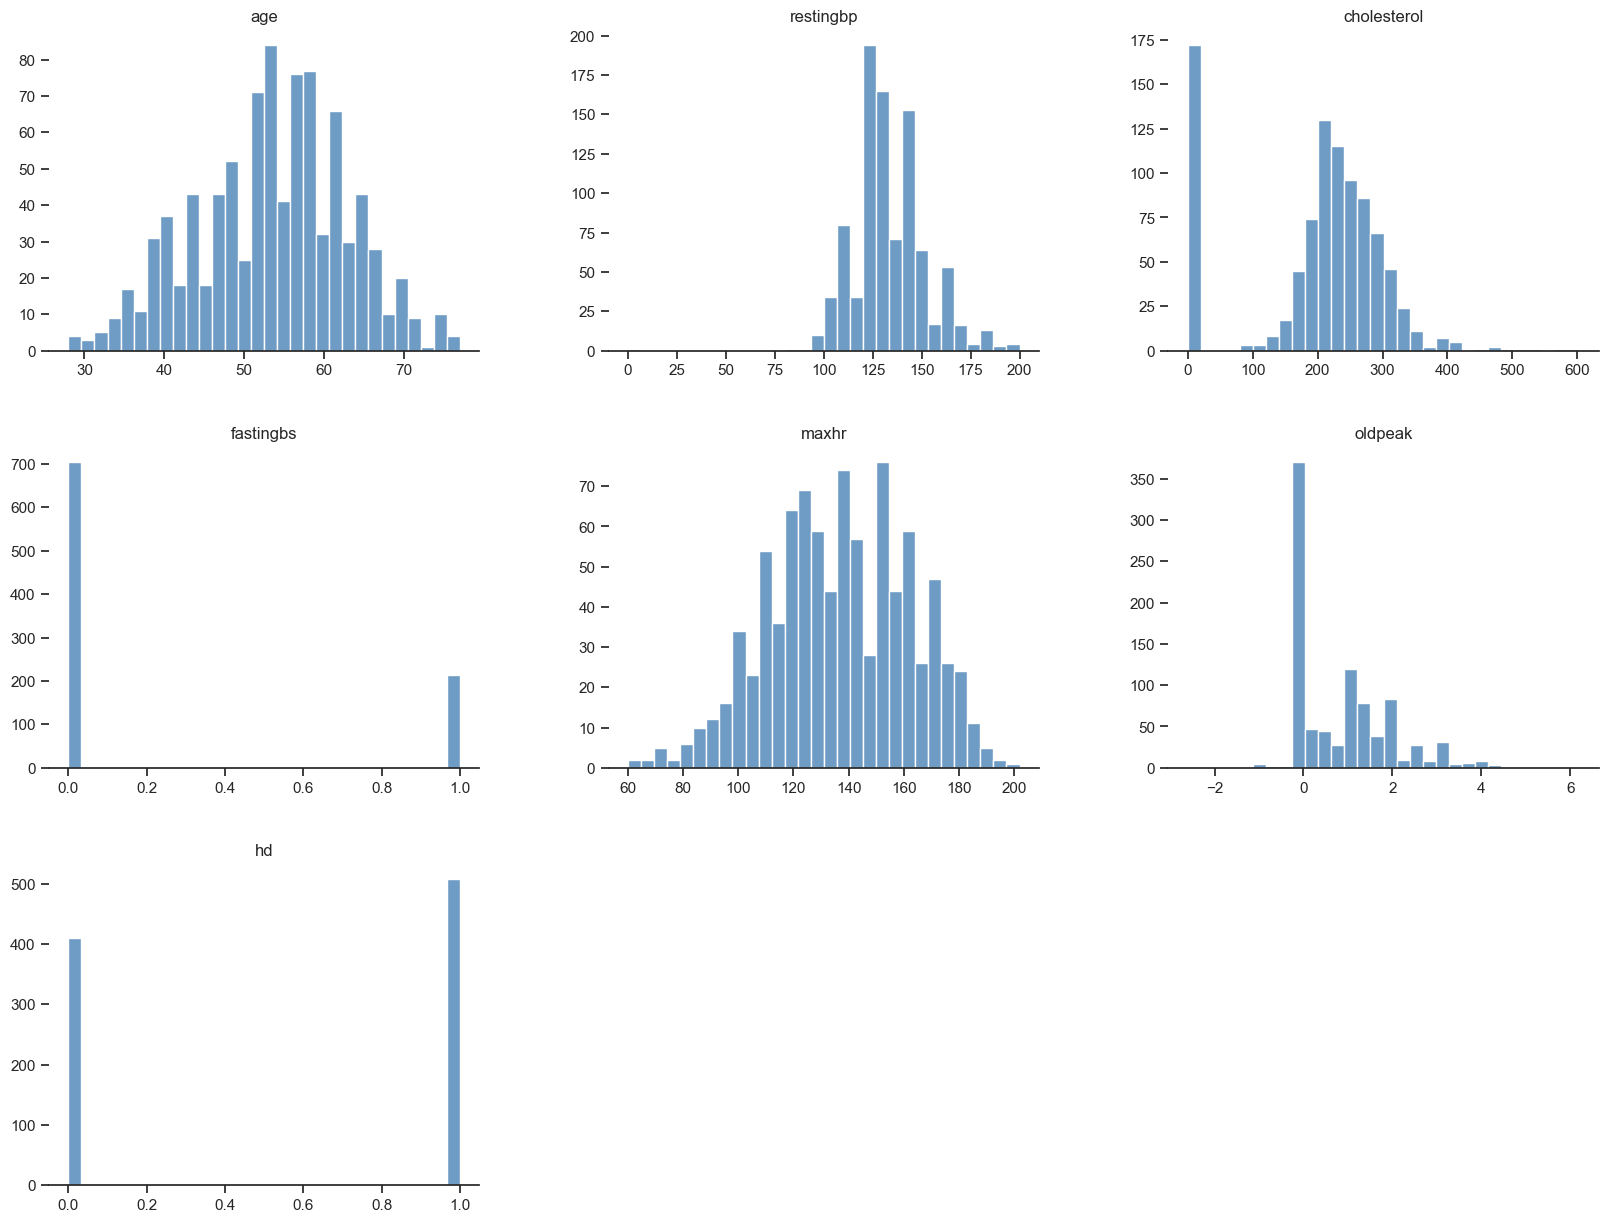

In [12]:
data_raw.hist(figsize=(20, 15), bins=30, grid=False, color=color);

### Creating Lists of Variables

In [13]:
create_var_lists(data_raw)

In [14]:
con_feat_list

['age', 'restingbp', 'cholesterol', 'maxhr', 'oldpeak']

In [15]:
cat_feat_list

['sex',
 'chestpaintype',
 'fastingbs',
 'restingecg',
 'exerciseangina',
 'st_slope']

In [16]:
tar_list

['hd']

In [17]:
not_zero_feat_list = ['age', 'restingbp', 'cholesterol', 'maxhr']

### Balance

Target Variable is balanced

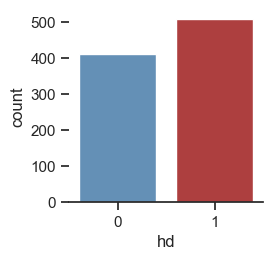

Total: 918 

Positive: 508
Negative: 410 

Positive / Negative: 1.24


In [18]:
balance(data_raw, tar_list)

## Data Splitting

In [19]:
data_train_raw, data_test_raw = train_test_split(data_raw,
                                                 test_size=0.2,
                                                 random_state=42)

In [20]:
print(data_train_raw.shape, data_test_raw.shape)

(734, 12) (184, 12)


## Data Cleaning and Transforming

**restingbp**: One zero value. <br>
**cholesterol**: A lot of zero values (about 20%). Replacing zero values with kNN Imputation. <br>

### Functions

In [21]:
def knn_imputer_create(df, features_list, tar_list):
    df_c = df.copy()
    df = pd.get_dummies(df, drop_first=1)
#     check only variables, that can't be zeroes

    for i in features_list:
        # filling i variable zero values by NaN
        df.loc[df[i] == 0, i] = np.nan

    imputer = KNNImputer(missing_values=np.nan, n_neighbors=5)
    imputer.fit(df, y=df[tar_list])
    
    arr = imputer.transform(df)

    for i in features_list:
        # transform df to get np.array with transformed values
        # get i variable values from this array by indicating it's index with get_loc method
        # replace i variable values in df by transformed values
        df_c[i] = arr[:, df.columns.get_loc(i)]

    return df_c, imputer


def knn_imputer(df, features_list, imputer):
    df_c = df.copy()
    df = pd.get_dummies(df, drop_first=1)

    for i in features_list:
        df.loc[df[i] == 0, i] = np.nan

    arr = imputer.transform(df)

    for i in features_list:
        df_c[i] = arr[:, df.columns.get_loc(i)]

    return df_c


def data_cleaned_display(df_raw, df_cleaned, variable, xlim, ylim):

    display(pd.concat([df_raw[variable].describe()
                       .to_frame().T
                       .rename(index={variable: 'before cleaning'}),
                       df_cleaned[variable].describe()
                       .to_frame().T
                       .rename(index={variable: 'after cleaning'})],
                      axis=0))

    f, ax = plt.subplots(1, 2, figsize=(13, 4))
    custom_xlim = (0, xlim)
    custom_ylim = (0, ylim)
    plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)

    sns.histplot(data=df_raw, x=variable, kde=1, ax=ax[0])
    sns.histplot(data=df_cleaned, x=variable, kde=1, ax=ax[1])

    plt.show()

### Filling zeroes using KNN-Imputation 

#### Cholesterol before and after imputation

In [22]:
data_train_raw.loc[data_train_raw.cholesterol == 0, 'cholesterol'].count()

137

In [23]:
data_train, imputer = knn_imputer_create(data_train_raw,
                                         not_zero_feat_list,
                                         tar_list)

,count,mean,std,min,25%,50%,75%,max
before cleaning,734.0,199.683924,108.216855,0.0,177.0,223.0,269.00,603.0
after cleaning,734.0,246.290191,51.719396,85.0,213.0,240.1,273.85,603.0


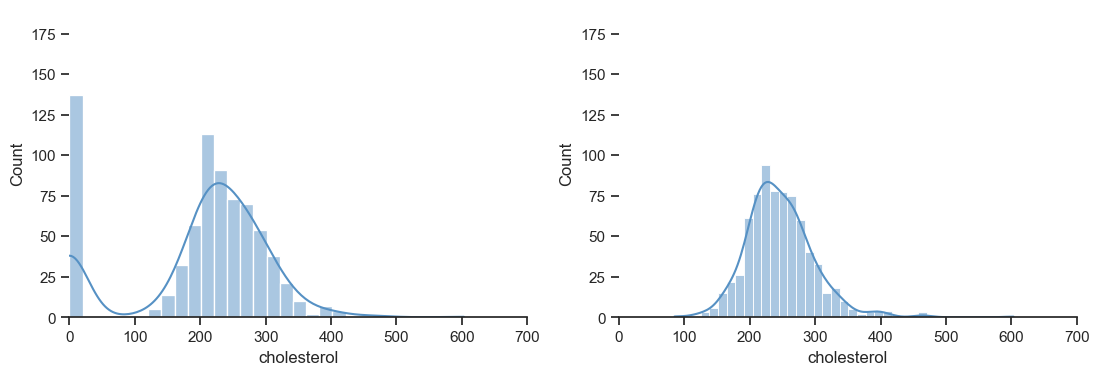

In [24]:
data_cleaned_display(data_train_raw,
                     data_train,
                     variable='cholesterol',
                     xlim=700,
                     ylim=190)

#### Restingbp before and after imputation

,count,mean,std,min,25%,50%,75%,max
before cleaning,734.0,133.064033,18.438941,0.0,120.0,130.0,140.0,200.0
after cleaning,734.0,133.236240,17.772728,94.0,120.0,130.0,140.0,200.0


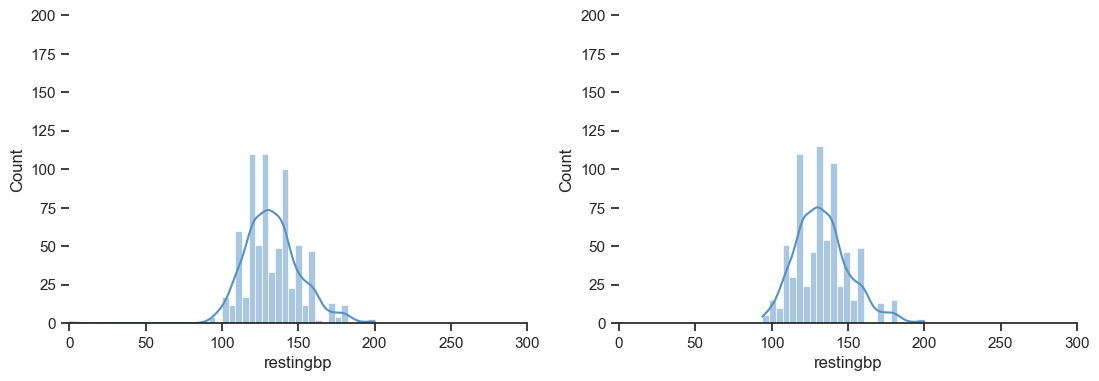

In [25]:
data_cleaned_display(data_train_raw,
                     data_train,
                     variable='restingbp',
                     xlim=300,
                     ylim=200)

In [26]:
data_train.shape

(734, 12)

### Cleaning Test Data 

#### Cholesterol before and after imputation

In [27]:
data_test_raw.loc[data_test_raw.cholesterol == 0, 'cholesterol'].count()

35

In [28]:
data_test = knn_imputer(data_test_raw,
                        not_zero_feat_list,
                        imputer)

,count,mean,std,min,25%,50%,75%,max
before cleaning,184.0,195.271739,114.157891,0.0,165.75,221.5,260.25,564.0
after cleaning,184.0,241.397826,64.392522,100.0,207.75,240.5,264.40,564.0


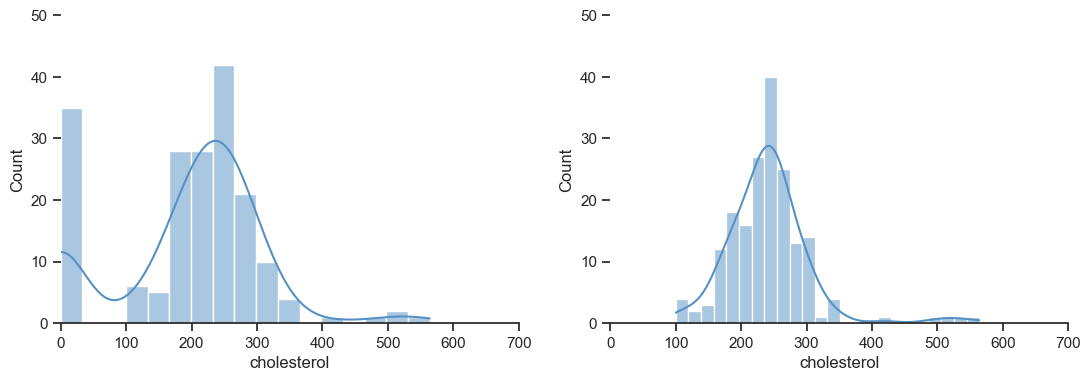

In [29]:
data_cleaned_display(data_test_raw,
                     data_test,
                     variable='cholesterol',
                     xlim=700,
                     ylim=50)

In [30]:
data_test.shape

(184, 12)

## Data Discovery

### Functions

In [31]:
def skewness(df):

    df = pd.DataFrame(df.skew(numeric_only=True),
                      columns=['skewness'],
                      index=None)

    df['highly skewed'] = (abs(df.skewness) > 0.5)
    df['ab'] = abs(df.skewness)

    df = df.sort_values(by=['ab', 'highly skewed'], ascending=False)
    df = df.drop('ab', axis=1)

    return df


def kurtosis(df):

    df = pd.DataFrame(df.kurtosis(numeric_only=True),
                      columns=['kurtosis'],
                      index=None)
    df['type'] = np.nan

    df.loc[df['kurtosis'] > 1, 'type'] = 'too peaked'
    df.loc[df['kurtosis'] < -1, 'type'] = 'too flat'
    df.loc[(df['kurtosis'] <= 1) & (df['kurtosis'] >= -1), 'type'] = 'normal'

    df['a'] = df['kurtosis']
    df = df.sort_values(by=['a', 'type'], ascending=False)
    df = df.drop('a', axis=1)

    return df


def corr_matrix_plot(df, variables, figsize=(5, 5)):

    corr = df[variables].corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = corr_matrix

    f, ax = plt.subplots(figsize=figsize)

    sns.heatmap(corr,
                mask=mask, cmap=cmap, annot=True, vmax=1, vmin=-1,
                center=0, square=True, linewidths=.5,
                annot_kws={'size': 9}, cbar_kws={'shrink': .6})

    plt.xticks(size=9)
    plt.yticks(size=9)
    plt.xticks(rotation=50)
    # plt.yticks(rotation=50)
    plt.show()


def vif(exogs, data):

    vif_dict, tolerance_dict = {}, {}

    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        X, y = data[not_exog], data[exog]

        r_squared = LinearRegression().fit(X, y).score(X, y)

        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif

        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance

    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})
    df_vif = df_vif.sort_values('VIF', ascending=0)

    return df_vif

## Quantitative Variables Exploration

In [32]:
con_feat_list

['age', 'restingbp', 'cholesterol', 'maxhr', 'oldpeak']

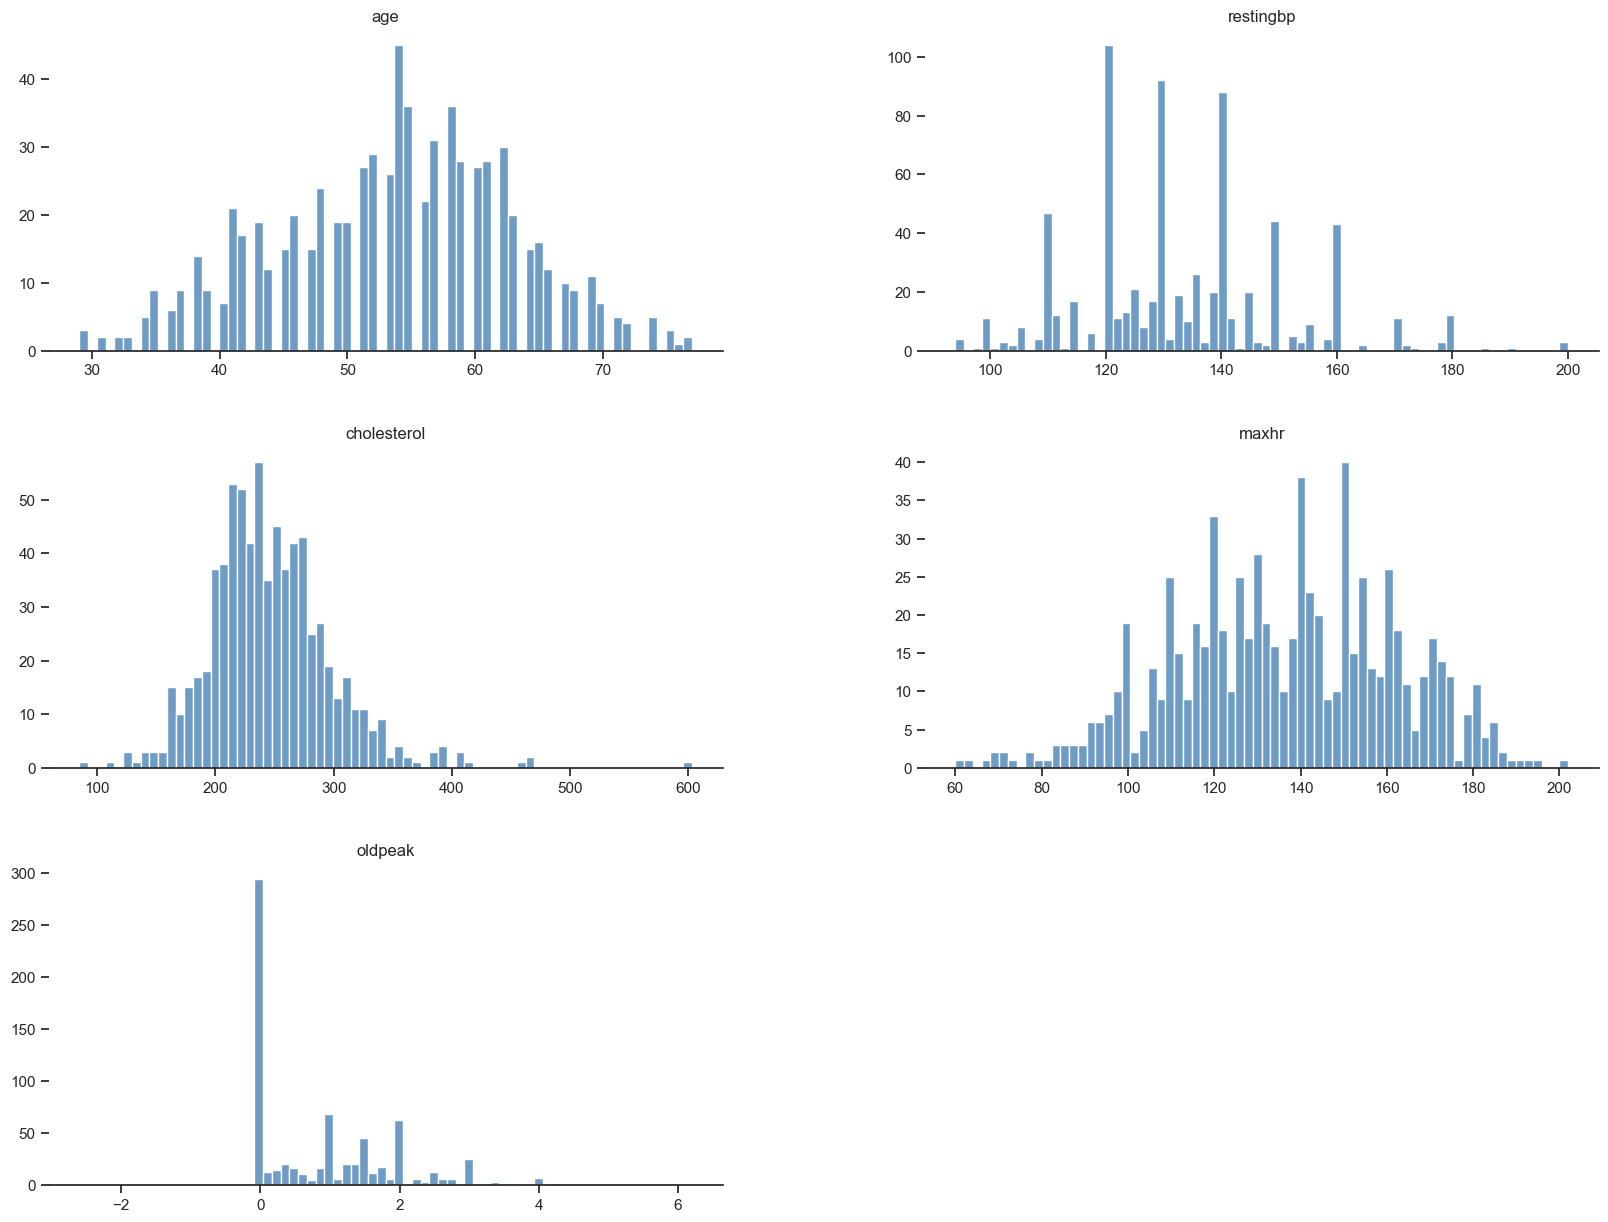

In [33]:
data_train[con_feat_list].hist(figsize=(20, 15), bins=70, grid=False, color=color);

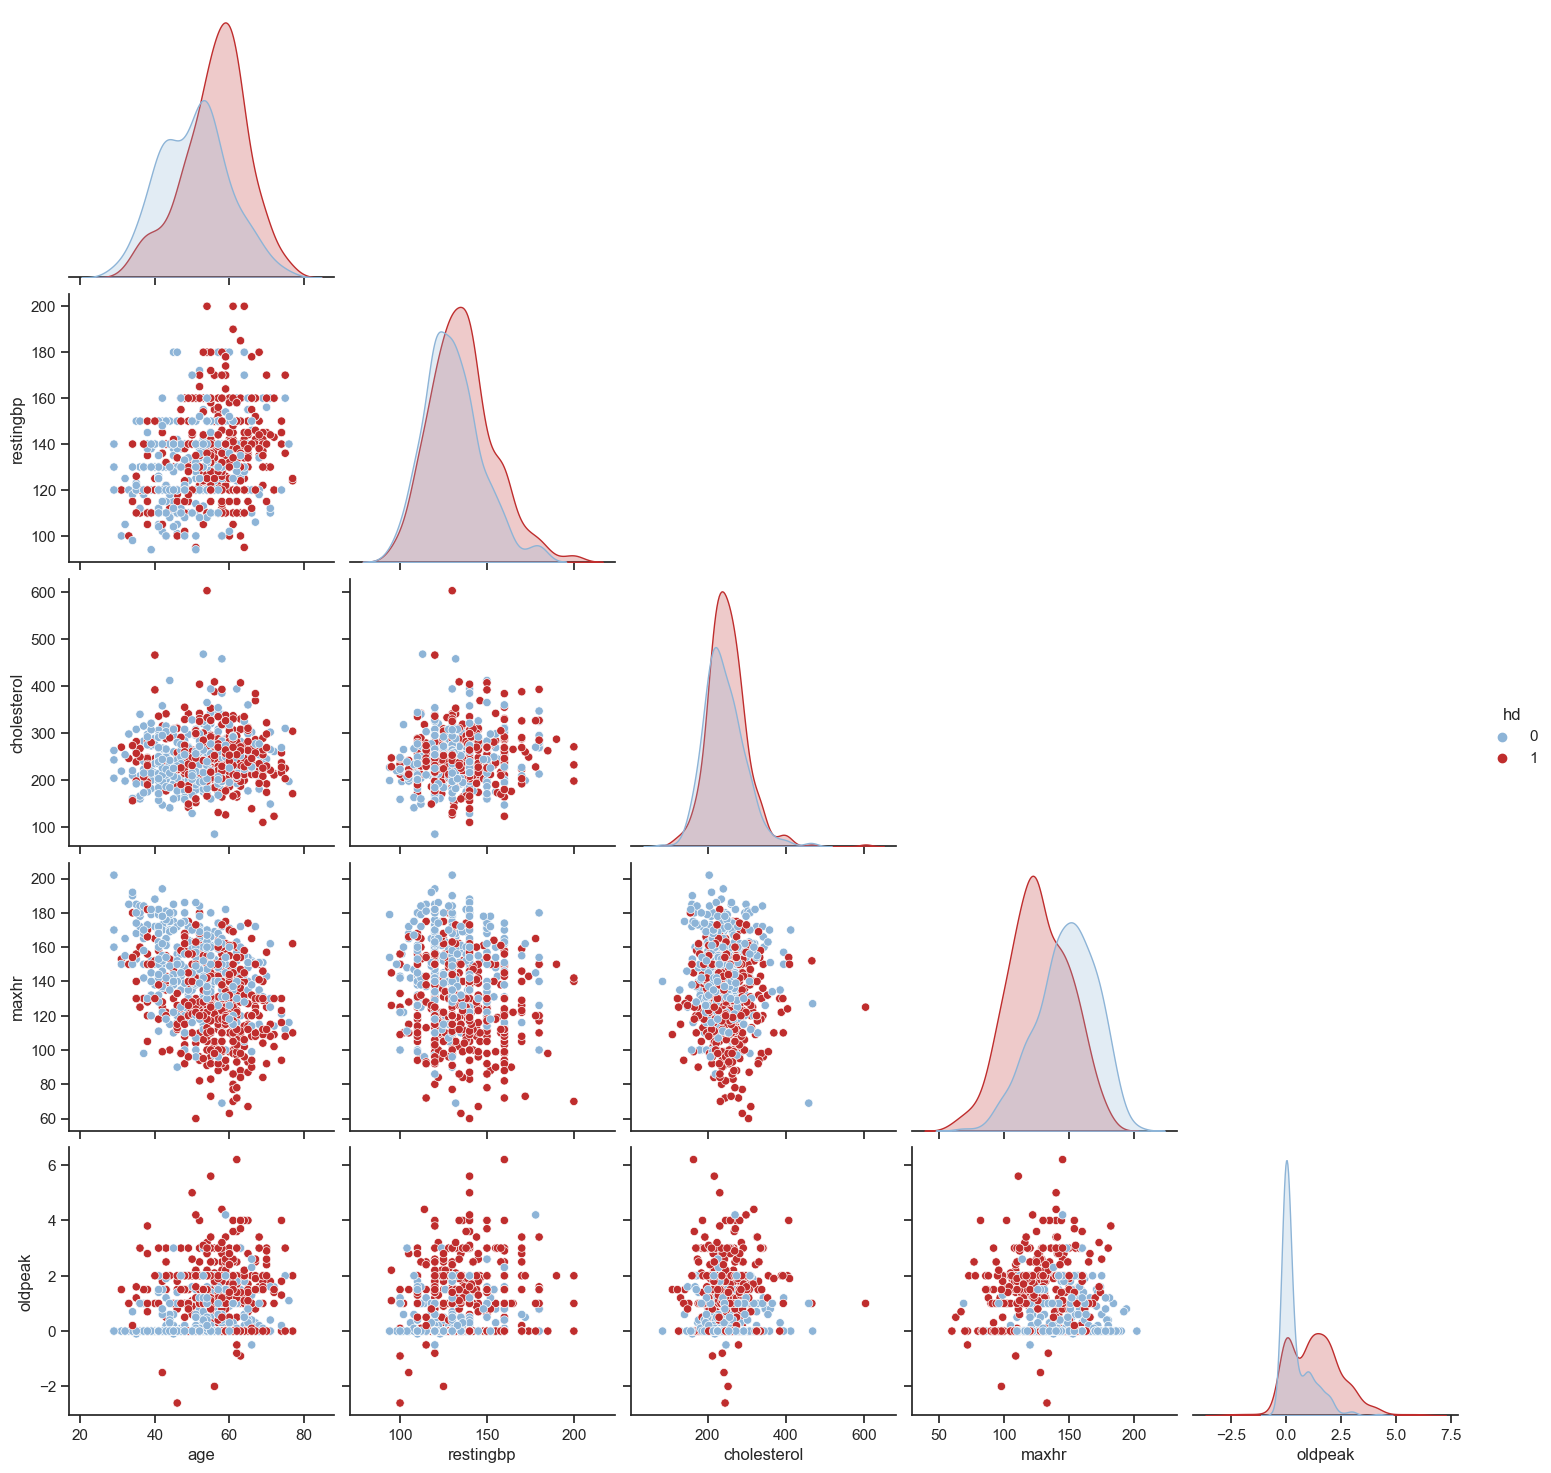

In [34]:
sns.pairplot(data=data_train[con_feat_list + tar_list],
             hue='hd',
             height=3,
             corner=True,
             palette=sns.color_palette(pairplot, 2));

#### Conclusions

**age** - looks like the patients with higher age more often have heart disease <br>
**maxhr** - looks like the patients with lower more often have heart disease <br>

**maxhr, age** - little correlation <br>

### Skewness and Kurtosis

In [35]:
skewness(data_train[con_feat_list])

,skewness,highly skewed
oldpeak,1.046324,True
cholesterol,1.043338,True
restingbp,0.635398,True
age,-0.180105,False
maxhr,-0.164850,False


In [36]:
kurtosis(data_train[con_feat_list])

,kurtosis,type
cholesterol,4.174759,too peaked
oldpeak,1.343654,too peaked
restingbp,0.643383,normal
age,-0.385349,normal
maxhr,-0.437575,normal


### Correlation and Multicollinearity

#### Correlation matrix

In [37]:
variables = con_feat_list+tar_list

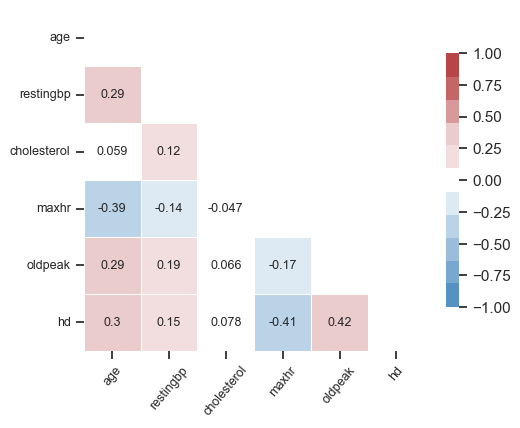

In [38]:
corr_matrix_plot(df=data_train,
                 variables=variables,
                 figsize=(5.5,5.5))

#### Conclusions

Correlation is low.

#### VIF

In [39]:
data_multi = data_train.copy()

In [40]:
# OneHot encoding for VIF
data_multi_oh = pd.get_dummies(data_multi.drop('hd', axis=1), drop_first=1)

# MinMax scaling for VIF
data_multi_oh_minmax = MinMaxScaler(feature_range=(0, 1)).fit_transform(data_multi_oh)
data_multi_oh_minmax = pd.DataFrame(data_multi_oh_minmax,
                                    columns=data_multi_oh.columns,
                                    index=data_multi_oh.index)

In [41]:
vif(data_multi_oh_minmax.columns, data_multi_oh_minmax)

,VIF,Tolerance
st_slope_Up,5.630585,0.177601
st_slope_Flat,4.655398,0.214804
restingecg_Normal,1.711663,0.584227
restingecg_ST,1.667999,0.599521
exerciseangina_Y,1.622877,0.616189
maxhr,1.542100,0.648466
oldpeak,1.519129,0.658272
chestpaintype_ATA,1.504044,0.664874
age,1.442599,0.693193
chestpaintype_NAP,1.276389,0.783460


#### Conclusions

All features VIF < 6, Tolerance > 0.18, Multicollinearity is rather low.

## Categorical variables exploration

In [42]:
cat_feat_list

['sex',
 'chestpaintype',
 'fastingbs',
 'restingecg',
 'exerciseangina',
 'st_slope']

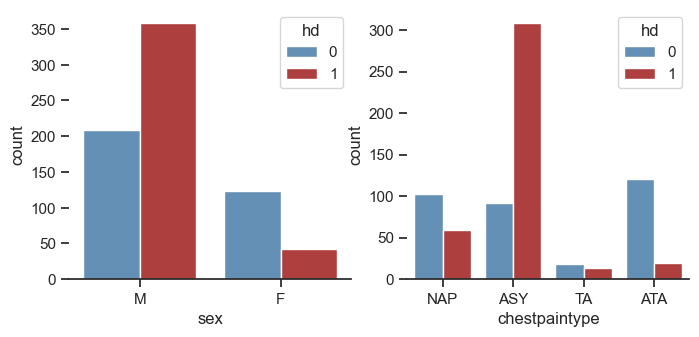

In [43]:
f, axes = plt.subplots(1, 2, figsize=(8, 3.5))

sns.countplot(data=data_train,
              x='sex',
              hue='hd',
              ax=axes[0])

sns.countplot(data=data_train,
              x='chestpaintype',
              hue='hd',
              ax=axes[1]);

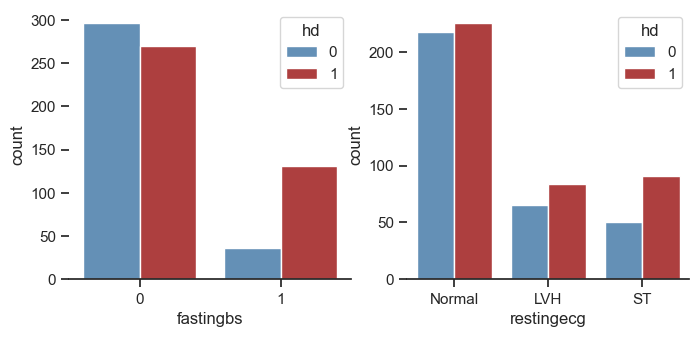

In [44]:
f, axes = plt.subplots(1, 2, figsize=(8, 3.5))

sns.countplot(data=data_train,
              x='fastingbs',
              hue='hd',
              ax=axes[0])

sns.countplot(data=data_train,
              x='restingecg',
              hue='hd',
              ax=axes[1]);

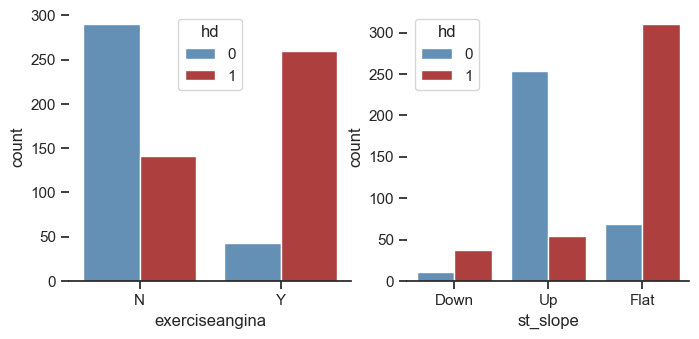

In [45]:
f, axes = plt.subplots(1, 2, figsize=(8, 3.5))

sns.countplot(data=data_train,
              x='exerciseangina',
              hue='hd',
              ax=axes[0])

sns.countplot(data=data_train,
              x='st_slope',
              hue='hd',
              ax=axes[1]);

#### Conclusions

- **sex** <br>
Looks like 'men=True' gives much more chanses to positive heart disease. <br>
- **fastingbs** <br>
Looks like 'fastingbs=1' gives more chanses to positive heart disease. <br>
- **exerciseangina** <br>
Looks like 'exerciseangina=1' gives more chanses to positive heart disease. <br>
- **restingecg** <br>
Looks like the most useless feature <br>
- **st_slope** <br>
Looks like the most important feature <br>
'st_slope=Flat' gives much more chanses to positive heart disease. <br>
'st_slope=Up' gives much more chanses to negative heart disease. <br>
- **chestpaintype** <br>
Looks like 'chestpaintype=ASY' gives more chanses to positive heart disease. <br>
Looks like 'chestpaintype=ASY' gives more chanses to negative heart disease. <br>

## Creating Datasets with Predictors and Target Variable

In [46]:
x_train = data_train.drop(tar_list, axis=1)
y_train = data_train[tar_list].values.ravel()

In [47]:
x_test = data_test.drop(tar_list, axis=1)
y_test = data_test[tar_list].values.ravel()

In [48]:
x_test.shape

(184, 11)

In [49]:
x_train.shape

(734, 11)

In [50]:
x_train.head()

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope
795,42.0,M,NAP,120.0,240.0,1,Normal,194.0,N,0.8,Down
25,36.0,M,NAP,130.0,209.0,0,Normal,178.0,N,0.0,Up
84,56.0,M,ASY,150.0,213.0,1,Normal,125.0,Y,1.0,Flat
10,37.0,F,NAP,130.0,211.0,0,Normal,142.0,N,0.0,Up
344,51.0,M,ASY,120.0,263.4,1,Normal,104.0,N,0.0,Flat


## Data Encoding And Scaling

### RobustScaler for Quantitative Variables

In [51]:
rs = RobustScaler()
rs.fit(x_train[con_feat_list])

x_train[con_feat_list] = rs.transform(x_train[con_feat_list])
x_test[con_feat_list] = rs.transform(x_test[con_feat_list])

In [52]:
x_test.shape

(184, 11)

In [53]:
x_train.shape

(734, 11)

In [54]:
x_train.head()

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope
795,-0.923077,M,NAP,-0.5,-0.001643,1,Normal,1.513514,N,0.133333,Down
25,-1.384615,M,NAP,0.0,-0.511093,0,Normal,1.081081,N,-0.400000,Up
84,0.153846,M,ASY,1.0,-0.445357,1,Normal,-0.351351,Y,0.266667,Flat
10,-1.307692,F,NAP,0.0,-0.478225,0,Normal,0.108108,N,-0.400000,Up
344,-0.230769,M,ASY,-0.5,0.382909,1,Normal,-0.918919,N,-0.400000,Flat


### Target Encoding for Categorial Variables

In [55]:
x_train_te = x_train.copy()
x_test_te = x_test.copy()

In [56]:
te = ce.TargetEncoder()
te.fit(x_train_te[cat_feat_list], y_train)

x_train_te[cat_feat_list] = te.transform(x_train_te[cat_feat_list])
x_test_te[cat_feat_list] = te.transform(x_test_te[cat_feat_list])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/category_encoders/target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [57]:
x_test.shape

(184, 11)

In [58]:
x_train_te.shape

(734, 11)

In [59]:
x_train_te.head()

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope
795,-0.923077,0.632042,0.364198,-0.5,-0.001643,1,0.509009,1.513514,0.327146,0.133333,0.770833
25,-1.384615,0.632042,0.364198,0.0,-0.511093,0,0.509009,1.081081,0.327146,-0.400000,0.175896
84,0.153846,0.632042,0.770574,1.0,-0.445357,1,0.509009,-0.351351,0.858086,0.266667,0.817942
10,-1.307692,0.253012,0.364198,0.0,-0.478225,0,0.509009,0.108108,0.327146,-0.400000,0.175896
344,-0.230769,0.632042,0.770574,-0.5,0.382909,1,0.509009,-0.918919,0.327146,-0.400000,0.817942


### One Hot Encoding for Categorial Variables

In [60]:
x_train_oh = x_train.copy()
x_test_oh = x_test.copy()

In [61]:
x_train_oh = pd.get_dummies(x_train_oh, drop_first=False)
x_test_oh = pd.get_dummies(x_test_oh, drop_first=False)

In [62]:
x_test_oh.shape

(184, 20)

In [63]:
x_train_oh.shape

(734, 20)

In [64]:
x_train_oh.head()

,age,restingbp,cholesterol,fastingbs,maxhr,oldpeak,sex_F,sex_M,chestpaintype_ASY,chestpaintype_ATA,chestpaintype_NAP,chestpaintype_TA,restingecg_LVH,restingecg_Normal,restingecg_ST,exerciseangina_N,exerciseangina_Y,st_slope_Down,st_slope_Flat,st_slope_Up
795,-0.923077,-0.5,-0.001643,1,1.513514,0.133333,0,1,0,0,1,0,0,1,0,1,0,1,0,0
25,-1.384615,0.0,-0.511093,0,1.081081,-0.400000,0,1,0,0,1,0,0,1,0,1,0,0,0,1
84,0.153846,1.0,-0.445357,1,-0.351351,0.266667,0,1,1,0,0,0,0,1,0,0,1,0,1,0
10,-1.307692,0.0,-0.478225,0,0.108108,-0.400000,1,0,0,0,1,0,0,1,0,1,0,0,0,1
344,-0.230769,-0.5,0.382909,1,-0.918919,-0.400000,0,1,1,0,0,0,0,1,0,1,0,0,1,0


## Model Evaluation

### Functions

In [65]:
def reset_seeds(seed):

    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)


def model_evaluation(models_list, x, y):

    df_c = pd.DataFrame(columns=['Precision', 'Recall', 'F1 Score', 'Time'])

    for clf in models_list:
        t_start = time.time()

        clf.fit(x, y)

        accuracy = cross_val_score(clf, x, y, cv=10, scoring='accuracy')
        precision = cross_val_score(clf, x, y, cv=10, scoring='precision')
        recall = cross_val_score(clf, x, y, cv=10, scoring='recall')
        f1_score = cross_val_score(clf, x, y, cv=10, scoring='f1_macro')

        clf = None

        t_end = time.time()
        t_time = str(datetime.timedelta(seconds=np.round(t_end - t_start)))

        df_c.loc[len(df_c)] = [np.round(precision.mean(), 2),
                               np.round(recall.mean(), 2),
                               np.round(f1_score.mean(), 2),
                               t_time]

    df_c.index = ['KNN', 'RF', 'SVC', 'SGDC', 'ET', 'LR']

    return df_c

### Models to evaluate:

- KNN: K-Nearest Neighbor
- RF: Random Forest
- SVC: Support Vector Machine
- SGDC: Stochastic Gradient Descent Classifier
- ETC: Extra Trees Classifier
- LR: Logistic Regression

In [66]:
models_list = [KNeighborsClassifier(),
               RandomForestClassifier(random_state=42),
               SVC(random_state=42),
               SGDClassifier(random_state=42),
               ExtraTreesClassifier(random_state=42),
               LogisticRegression(solver='saga', max_iter=5000, random_state=42)]

In [67]:
models_te = model_evaluation(models_list, x_train_te, y_train)
models_oh = model_evaluation(models_list, x_train_oh, y_train)

In [68]:
models_te

,Precision,Recall,F1 Score,Time
KNN,0.83,0.83,0.81,0:00:01
RF,0.86,0.90,0.86,0:00:10
SVC,0.85,0.90,0.85,0:00:01
SGDC,0.84,0.83,0.81,0:00:00
ET,0.86,0.89,0.86,0:00:11
LR,0.86,0.88,0.85,0:00:01


In [69]:
models_oh

,Precision,Recall,F1 Score,Time
KNN,0.84,0.89,0.84,0:00:01
RF,0.86,0.91,0.86,0:00:10
SVC,0.85,0.90,0.85,0:00:01
SGDC,0.84,0.83,0.81,0:00:00
ET,0.86,0.88,0.85,0:00:09
LR,0.86,0.88,0.85,0:00:02


Choose RF with Target Encoding and SVC with One-Hot Encoding for further exploration.

## Hyperparameters Tuning and Model Selection

### Functions

In [70]:
def hyperparameters(x_train, y_train, clf, scoring, search, hyper_params):

    if search == 'random':
        cv = RandomizedSearchCV(estimator=clf,
                                param_distributions=hyper_params,
                                scoring=scoring,
                                cv=5,
                                random_state=42)

        t_start = time.time()

        cv.fit(x_train, y_train)

        best_estimator = cv.best_estimator_

        t_end = time.time()
        t_time = str(datetime.timedelta(seconds=np.round(t_end - t_start)))

        print('Time for hyperparameters searching: {}'.format(t_time), '\n')
        print(cv.best_estimator_, '\n')

        return best_estimator

    if search == 'grid':
        cv = GridSearchCV(estimator=clf,
                          param_grid=hyper_params,
                          scoring=scoring,
                          cv=5)

        t_start = time.time()

        cv.fit(x_train, y_train)

        best_estimator = cv.best_estimator_

        t_end = time.time()
        t_time = np.round((t_end - t_start) / 60, 3)

        print('Time for hyperparameters searching: {}'.format(t_time), '\n')
        print(cv.best_estimator_, '\n')

        return best_estimator

    clf = None
    cv = None


def class_report(y_test, y_pred, name, encoding):

    cl_report_df = classification_report(y_test,
                                         y_pred,
                                         target_names=['0', '1'],
                                         output_dict=True)

    plt.subplots(figsize=(6.5, 2.2))
    sns.heatmap(pd.DataFrame(cl_report_df).iloc[:-1, :].T,
                cmap=report,
                annot_kws={'size': 9.5},
                cbar_kws={'shrink': 1},
                annot=True,
                xticklabels=['Precision', 'Recall', 'F1-Score'],
                yticklabels=['HD: 0', 'HD: 1', 'Accuracy', 'Macro Avg', 'Weighted Avg'],
                vmin=0.85, vmax=0.95)

    plt.xticks(size=9)
    plt.yticks(size=9)
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.title('Classification Report {} {}'.format(str.upper(name), str.upper(encoding)), fontsize=15, y=1.05)

    # plt.savefig('classification_report.png')

    plt.show()

### Random Forest Classifier with Target Encoded Data

In [71]:
n_estimators = [10, 20, 30, 40, 50, 100]
max_depth = [10, 20, 30, 40, 50, 100]
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [2, 4, 6, 8, 10]
max_features = ['sqrt', 'log2', None]

hyper_params_rf = {'n_estimators': n_estimators,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'max_features': max_features}

In [72]:
clf_rf_te = hyperparameters(x_train_te, y_train,
                            clf=RandomForestClassifier(random_state=42),
                            scoring='f1',
                            search='random',
                            hyper_params=hyper_params_rf)

Time for hyperparameters searching: 0:00:05 

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=6,
                       n_estimators=50, random_state=42) 



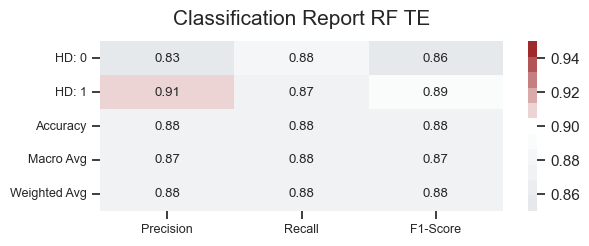

In [73]:
clf_rf_te.fit(x_train_te, y_train)

y_pred_rf_te = clf_rf_te.predict(x_test_te)
y_pred_prob_rf_te = clf_rf_te.predict_proba(x_test_te)

class_report(y_test,
             y_pred_rf_te,
             name='rf',
             encoding='te')

### Support Vector Classification with One-Hot Encoded Data

In [74]:
C = [0.001, 0.01, 0.1, 1, 10, 100]
gamma = [0.001, 0.01, 0.1, 1, 10, 100]

hyper_params_svm = {'C': C,
                    'gamma': gamma}

In [75]:
clf_svm_oh = hyperparameters(x_train_oh, y_train,
                             clf=SVC(random_state=42),
                             scoring='f1',
                             search='random',
                             hyper_params=hyper_params_svm)

Time for hyperparameters searching: 0:00:02 

SVC(C=100, gamma=0.001, random_state=42) 



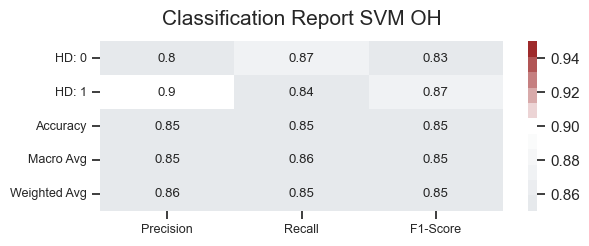

In [76]:
clf_svm_oh.fit(x_train_oh, y_train)

y_pred_svm_oh = clf_svm_oh.predict(x_test_oh)
y_pred_df_svm_oh = clf_svm_oh.decision_function(x_test_oh)

class_report(y_test,
             y_pred_svm_oh,
             name='svm',
             encoding='oh')

## ROC Curve (Random Forest and SVM Comparison)

### Functions

In [77]:
def roc(y_test, dec_func1, dec_func2, name1, name2):

    fpr_name1, tpr_name1, thresholds_name1 = roc_curve(y_test, dec_func1)
    roc_auc_name1 = auc(fpr_name1, tpr_name1)

    fpr_name2, tpr_name2, thresholds_name2 = roc_curve(y_test, dec_func2)
    roc_auc_name2 = auc(fpr_name2, tpr_name2)

    plt.figure(figsize=(7, 5))
    plt.plot(fpr_name1, tpr_name1, label='ROC Curve {} (area = %0.2f)'.format(name1) % roc_auc_name1)
    plt.plot(fpr_name2, tpr_name2, label='ROC Curve {} (area = %0.2f)'.format(name2) % roc_auc_name2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.08])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate (Recall)', fontsize=12)
    plt.title('Receiver Operating Characteristic', fontsize=15)
    plt.xticks(size=9)
    plt.yticks(size=9)

    close_default_name1 = np.argmin(np.abs(thresholds_name1 - 0.5))
    plt.plot(fpr_name1[close_default_name1],
             tpr_name1[close_default_name1],
             marker='^',
             markersize=8,
             label='0.5 {} Predict Probability Threshold'.format(name1),
             fillstyle='none',
             c='k',
             mew=1.7)

    close_zero_name2 = np.argmin(np.abs(thresholds_name2 - 0.5))
    plt.plot(fpr_name2[close_zero_name2],
             tpr_name2[close_zero_name2],
             marker='o',
             markersize=8,
             label='0.5 {} Predict Probability Threshold'.format(name2),
             fillstyle='none',
             color='k',
             mew=1.7)

    plt.legend(loc='lower right', fontsize=10)

    # plt.savefig('roc_auc.png')

    plt.show()

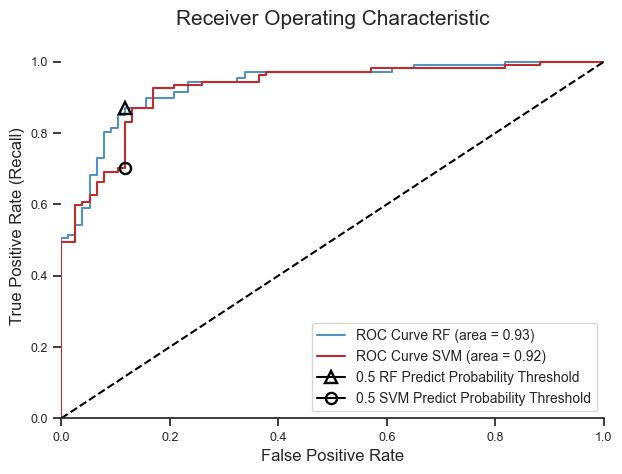

In [78]:
roc(y_test,
    y_pred_prob_rf_te[:, 1],
    y_pred_df_svm_oh,
    name1='RF',
    name2='SVM')

## Feature Importances (Random Forest with Target Encoded Data)

### Functions

In [79]:
def feat_imp_plot(feature_importances):

    f = sns.catplot(x='MDI',
                    y='index',
                    kind='bar',
                    palette=gradient_blue,
                    data=feature_importances.sort_values('MDI', ascending=False).reset_index(),
                    height=5, aspect=2.5)

    f.fig.suptitle('Feature Importances', fontsize=18, y=1.03)
    f.axes[0, 0].set_xlabel('MDI', size=12)
    f.axes[0, 0].set_ylabel('Feature', size=12)
    sns.despine(left=True, bottom=False)

In [80]:
feature_importances_rf_te = pd.DataFrame(clf_rf_te.feature_importances_,
                                         index=x_train_te.columns,
                                         columns=['MDI']).sort_values('MDI', ascending=0)

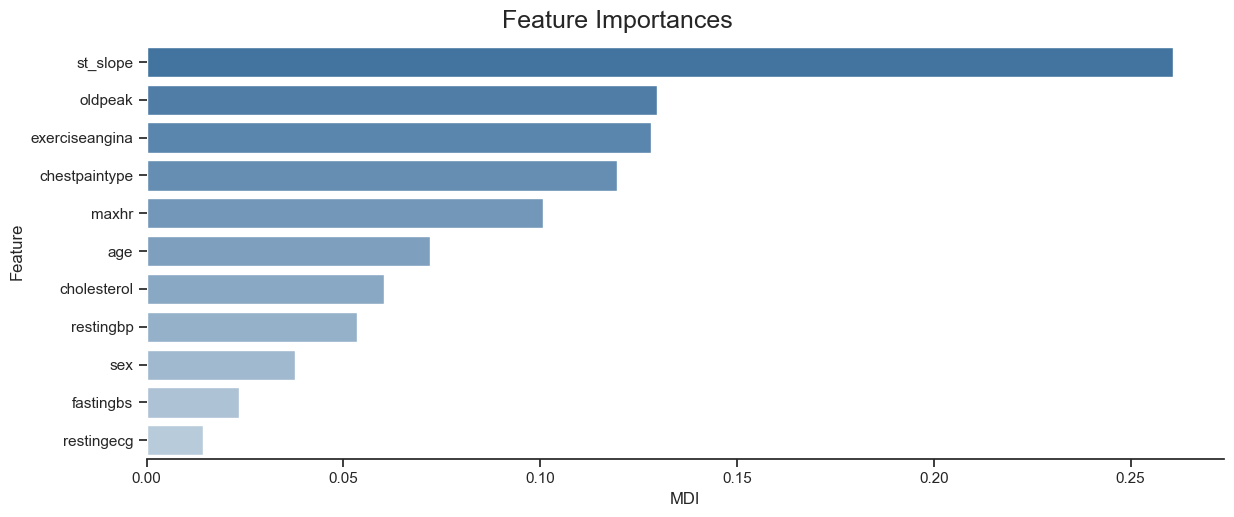

In [81]:
feat_imp_plot(feature_importances_rf_te)

In [82]:
feature_importances_rf_te

,MDI
st_slope,0.260676
oldpeak,0.129610
exerciseangina,0.128188
chestpaintype,0.119376
maxhr,0.100758
age,0.072016
cholesterol,0.060402
restingbp,0.053394
sex,0.037795
fastingbs,0.023528


## Precision-Recall Trade-off

### Functions

In [83]:
def prec_rec(y_test, y_pred, y_pred_prob):

    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
#     calculate f_score
    f = (2 * precision * recall) / (precision + recall)
#     locate the index of the largest f_score
    x = np.argmax(f)
#     calculate best recall, precision
    precision_opt = round(precision[x], 2)
    recall_opt = round(recall[x], 2)
    threshold_opt = round(thresholds[x], 2)

    plt.figure(figsize=(6, 4))
    plt.xlabel('Recall', fontsize=12)
    plt.ylabel('Precision', fontsize=12)
    plt.title('Precision-Recall Curve', fontsize=15, y=1.05)

    plt.plot(recall,
             precision)
    plt.plot(recall_opt,
             precision_opt,
             marker='o',
             markersize=10,
             label='Precision-Recall Optimal Threshold',
             fillstyle='none',
             color='k',
             mew=1.7)

    plt.xticks(size=9)
    plt.yticks(size=9)
    plt.legend(loc='best', fontsize=10)
    # plt.savefig('roc_auc.png')
    plt.show()

    return precision_opt, recall_opt, threshold_opt


def threshold_range(y_test, y, lower=0.2, upper=0.5, step=0.05, kind='prob'):

    arr = np.arange(lower, upper, step)
    df = pd.DataFrame(columns=['threshold', 'precision', 'recall', 'f1_score'])

    if kind == 'prob':
        for i in arr:
            y_pred_lower_threshold = np.where(y[:, 1] >= i, 1, 0)
            p = precision_score(y_test, y_pred_lower_threshold).round(2)
            r = recall_score(y_test, y_pred_lower_threshold).round(2)
            f1 = f1_score(y_test, y_pred_lower_threshold).round(2)

            l = [i, p, r, f1]
            df.loc[len(df)] = l

        return df

    if kind == 'func':
        for i in arr:
            y_pred_lower_threshold = np.where(y >= i, 1, 0)
            p = precision_score(y_test, y_pred_lower_threshold).round(2)
            r = recall_score(y_test, y_pred_lower_threshold).round(2)
            f1 = f1_score(y_test, y_pred_lower_threshold).round(2)

            j = round(i, 4)

            l = [j, p, r, f1]
            df.loc[len(df)] = l

        return df


def conf_matrix(y, y_pred):

    fig, ax = plt.subplots(figsize=(6.5, 1.5))

    ax = sns.heatmap(confusion_matrix(y, y_pred),
                     cmap=gradient_grey,
                     annot_kws={'size': 10},
                     cbar_kws={'shrink': 1},
                     annot=True,
                     xticklabels=['NO', 'YES'],
                     yticklabels=['NO', 'YES'],
                     cbar=False,
                     fmt='g')

    plt.xticks(size=9)
    plt.yticks(size=9)
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.title('Confusion Matrix', fontsize=15, y=1.1)

    ax.set_ylabel('Test', fontsize=12)
    ax.set_xlabel('Predicted', fontsize=12)

    # plt.savefig('classification_report.png')

    plt.show()

### Random Forest with Target Encoded Data

#### Precision-Recall Curve and Optimal Parameters

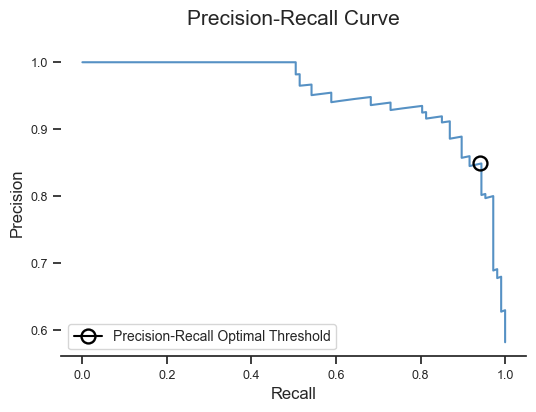

In [84]:
rf_precision_opt, rf_recall_opt, rf_threshold_opt = prec_rec(y_test,
                                                             y_pred_rf_te,
                                                             y_pred_prob_rf_te[:, 1])

In [85]:
rf_precision_opt, rf_recall_opt, rf_threshold_opt

(0.85, 0.94, 0.27)

### Manually Threshold Selection

In [86]:
threshold_range(y_test,
                y_pred_prob_rf_te,
                lower=0,
                upper=0.55,
                step=0.05,
                kind='prob')

,threshold,precision,recall,f1_score
0,0.00,0.58,1.00,0.74
1,0.05,0.65,0.99,0.79
2,0.10,0.70,0.97,0.82
3,0.15,0.75,0.97,0.85
4,0.20,0.79,0.97,0.87
5,0.25,0.80,0.94,0.87
6,0.30,0.85,0.93,0.88
7,0.35,0.86,0.91,0.88
8,0.40,0.89,0.90,0.89
9,0.45,0.89,0.88,0.88


In [87]:
threshold_rf = 0.2

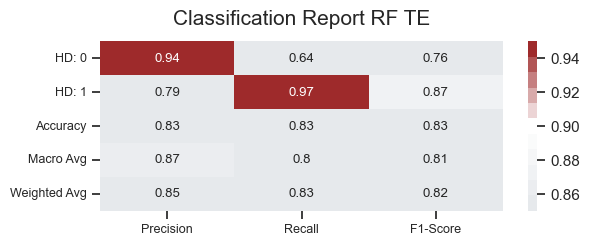

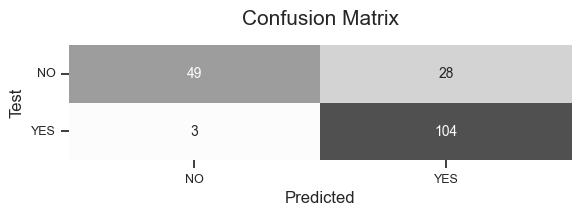

In [88]:
y_pred_rf = (y_pred_prob_rf_te[:, 1] >= threshold_rf).astype('float64')

class_report(y_test,
             y_pred_rf,
             name='rf',
             encoding='te')

conf_matrix(y_test, y_pred_rf)

### SVM with One-Hot Encoded Data

#### Precision-Recall Curve and Optimal Parameters

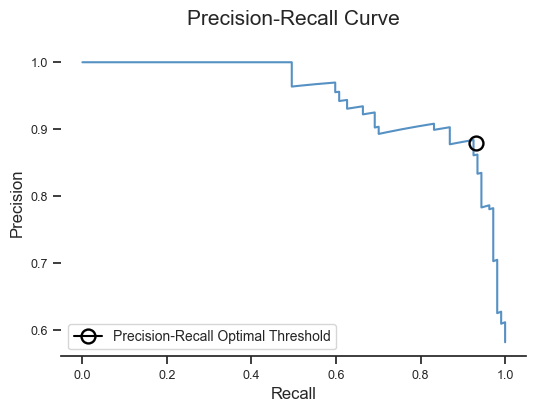

In [89]:
svm_precision_opt, svm_recall_opt, svm_threshold_opt = prec_rec(y_test,
                                                                y_pred_svm_oh,
                                                                y_pred_df_svm_oh)

In [90]:
svm_precision_opt, svm_recall_opt, svm_threshold_opt

(0.88, 0.93, -0.5)

### Manually Threshold Selection

In [91]:
threshold_range(y_test,
                y_pred_df_svm_oh,
                lower=-1.3,
                upper=-0.2,
                step=0.1,
                kind='func')

,threshold,precision,recall,f1_score
0,-1.3,0.76,0.97,0.86
1,-1.2,0.79,0.96,0.87
2,-1.1,0.79,0.94,0.86
3,-1.0,0.82,0.94,0.88
4,-0.9,0.83,0.93,0.88
5,-0.8,0.85,0.93,0.89
6,-0.7,0.85,0.93,0.89
7,-0.6,0.87,0.93,0.90
8,-0.5,0.88,0.92,0.90
9,-0.4,0.88,0.90,0.89


In [92]:
threshold_svm = -1.2

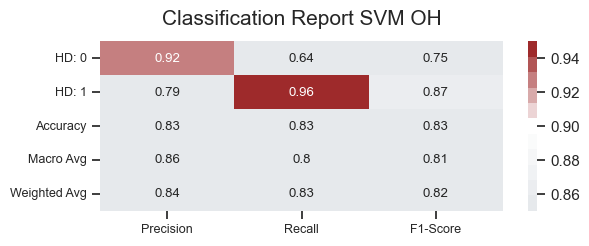

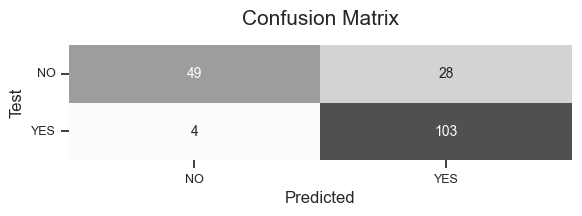

In [93]:
y_pred_svm = (y_pred_df_svm_oh > threshold_svm).astype('float64')

class_report(y_test,
             y_pred_svm,
             name='svm',
             encoding='oh')

conf_matrix(y_test, y_pred_svm)

## Final Datasets

### Random Forest Classifier with Target Encoded Data

In [94]:
data_pred_rf = data_test.copy()

In [95]:
data_pred_rf['hd'] = y_test
data_pred_rf['hd_rf'] = [int(i) for i in y_pred_rf]

In [96]:
data_pred_rf['error'] = data_pred_rf['hd'] != data_pred_rf['hd_rf']

In [97]:
data_pred_rf.loc[data_pred_rf.error == True, 'error'].count()

31

In [98]:
data_pred_rf.loc[(data_pred_rf.error == True) & (data_pred_rf.hd == 1)]['hd'].count()

3

In [99]:
data_pred_rf.loc[(data_pred_rf.error == True) & (data_pred_rf.hd == 1)]

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,hd,hd_rf,error
655,40.0,M,ASY,152.0,223.0,0,Normal,181.0,N,0.0,Up,1,0,True
759,54.0,M,ATA,192.0,283.0,0,LVH,195.0,N,0.0,Up,1,0,True
684,47.0,M,NAP,108.0,243.0,0,Normal,152.0,N,0.0,Up,1,0,True


### SVM with One-Hot Encoded Data

In [100]:
data_pred_svm = data_test.copy()

In [101]:
data_pred_svm['hd'] = y_test
data_pred_svm['hd_svm'] = y_pred_svm

In [102]:
data_pred_svm['error'] = data_pred_svm['hd'] != data_pred_svm['hd_svm']

In [103]:
data_pred_svm.loc[data_pred_svm.error == True, 'error'].count()

32

In [104]:
data_pred_svm.loc[(data_pred_svm.error == True) & (data_pred_svm.hd == 1)]['hd'].count()

4

In [105]:
data_pred_svm.loc[(data_pred_svm.error == True) & (data_pred_svm.hd == 1)]

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,hd,hd_svm,error
655,40.0,M,ASY,152.0,223.0,0,Normal,181.0,N,0.0,Up,1,0.0,True
759,54.0,M,ATA,192.0,283.0,0,LVH,195.0,N,0.0,Up,1,0.0,True
375,73.0,F,NAP,160.0,266.4,0,ST,121.0,N,0.0,Up,1,0.0,True
684,47.0,M,NAP,108.0,243.0,0,Normal,152.0,N,0.0,Up,1,0.0,True


## Additionally: Comparison with seven-layer Neural Network (One-Hot Encoded Data)

### Functions

In [106]:
def model_nn(layers, neurons, lr=0.001, drop=0.2, input_shape=None):

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=input_shape,
                                    name='input'))

    for layer in range(layers):
        model.add(tf.keras.layers.Dense(units=neurons,
                                        activation='selu'))
        model.add(tf.keras.layers.Dropout(drop))

    model.add(tf.keras.layers.Dense(units=1,
                                    activation='sigmoid',
                                    name='output'))

    model.compile(optimizer=tf.optimizers.Adam(learning_rate=lr),
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=[tf.keras.metrics.Recall()])

    return model


def dnn_ev_plot(history):

    pd.DataFrame(history.history).plot(figsize=(10, 6))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()


def nn_fit(model, x_train, y_train, last=False, graph=False, early_stopping=None):

    history = model.fit(x_train,
                        y_train,
                        epochs=500,
                        validation_split=0.2,
                        verbose=0,
                        callbacks=early_stopping)

    if last is False:
        display(pd.DataFrame(history.history))
    else:
        display(pd.DataFrame(history.history).iloc[[-1]])
    if graph is True:
        dnn_ev_plot(history)

## Model Selection

In [107]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=0,
    restore_best_weights=True
)

params = {'layers': 3,
          'neurons': 50,
          'lr': 0.001,
          'drop': 0,
          'input_shape': x_train_oh.shape[1:]}

,loss,recall,val_loss,val_recall
24,0.269487,0.923781,0.418944,0.890411


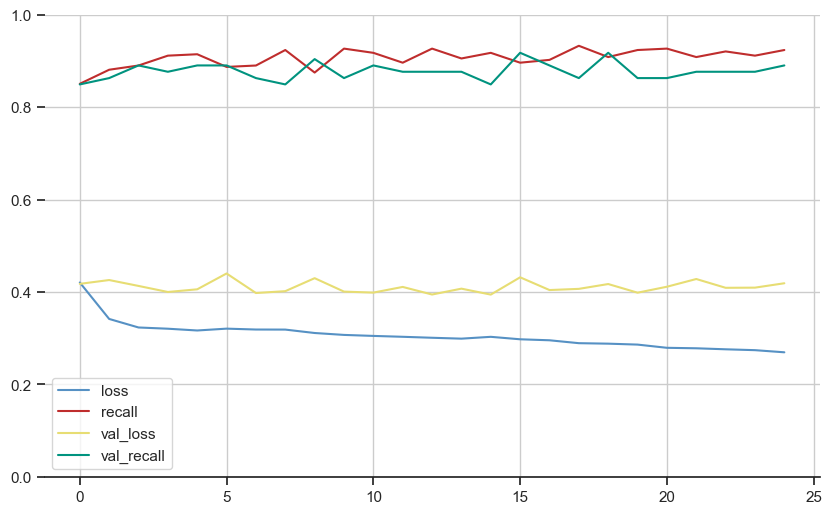

6/6 [==============================] - 0s 2ms/step


In [108]:
reset_seeds(seed)

nn = model_nn(**params)
nn_fit(nn,
       x_train_oh,
       y_train,
       last=True,
       graph=True,
       early_stopping=early_stopping)

y_pred_prob_nn_oh = np.concatenate(nn.predict(x_test_oh))
y_pred_nn_oh = np.array([round(float(i), 0) for i in y_pred_prob_nn_oh])

In [109]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1050      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 output (Dense)              (None, 1)                 5

## Precision-Recall Trade-off

In [110]:
threshold_range(y_test,
                y_pred_prob_nn_oh,
                lower=0,
                upper=0.55,
                step=0.05,
                kind='func')

,threshold,precision,recall,f1_score
0,0.00,0.58,1.00,0.74
1,0.05,0.70,0.98,0.81
2,0.10,0.79,0.96,0.87
3,0.15,0.82,0.91,0.86
4,0.20,0.84,0.90,0.87
5,0.25,0.87,0.88,0.87
6,0.30,0.89,0.86,0.88
7,0.35,0.90,0.84,0.87
8,0.40,0.91,0.83,0.87
9,0.45,0.91,0.80,0.85


In [111]:
threshold_nn = 0.1

In [112]:
y_pred_nn = (y_pred_prob_nn_oh > threshold_nn).astype('float64')

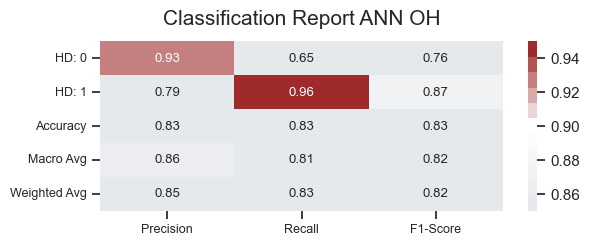

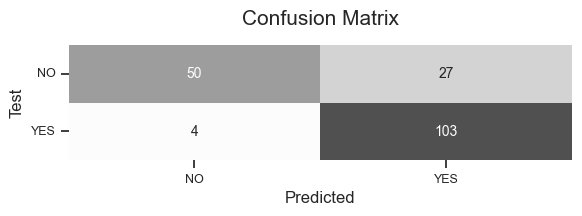

In [113]:
class_report(y_test,
             y_pred_nn,
             name='ann',
             encoding='oh')

conf_matrix(y_test, y_pred_nn)

In [114]:
prob_df = pd.DataFrame(y_pred_prob_nn_oh,
                       columns=['pred_prob']).reset_index()
prob_df['hd'] = y_test

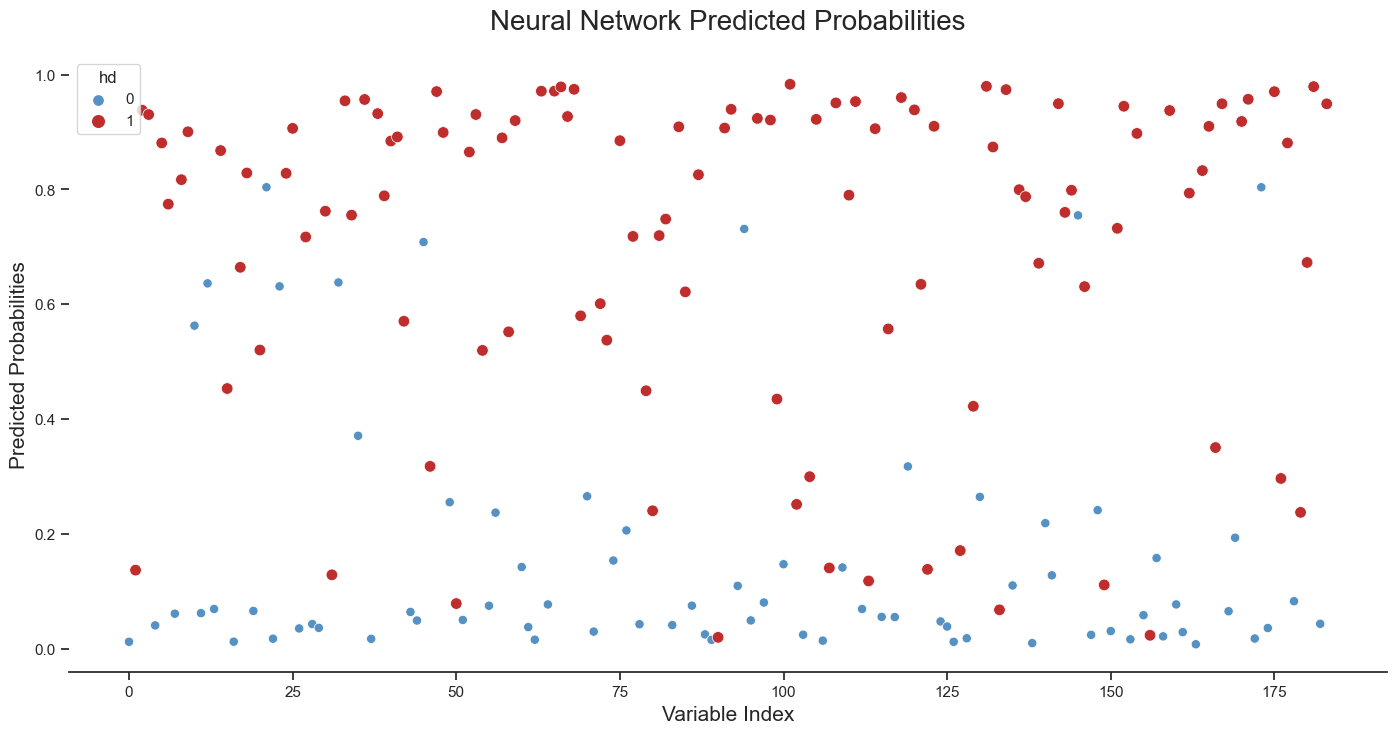

In [115]:
plt.subplots(figsize=(17, 8))

plt.title('Neural Network Predicted Probabilities', fontsize=20, y=1.03)
plt.xlabel('Variable Index', fontsize=15)
plt.ylabel('Predicted Probabilities', fontsize=15)


sns.scatterplot(x='index',
                y='pred_prob',
                hue='hd',
                size='hd',
                sizes=(70, 45),
                data=prob_df);

## Final Models Comparison

In [116]:
def summary(y_test, y_pred_list):

    df = pd.DataFrame(columns=['False Negative', 'False Positive', 'True Positive', 'True Negative'])

    for i in y_pred_list:
        tn, fp, fn, tp = confusion_matrix(y_test, i).ravel()
        df.loc[len(df)] = [fn, fp, tp, tn]
    df.index = ['RF', 'SVM', 'NN']

    return df

In [117]:
summary(y_test, [y_pred_rf, y_pred_svm, y_pred_nn])

,False Negative,False Positive,True Positive,True Negative
RF,3,28,104,49
SVM,4,28,103,49
NN,4,27,103,50
